In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

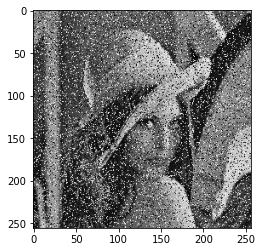

In [ ]:
path1 = '/content/drive/MyDrive/Image Processing/noisy_lena.jpg'
path2 = '/content/drive/MyDrive/Image Processing/rubiks_cube.png'

img = cv2.imread(path1, cv2.IMREAD_COLOR)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Bilateral

In [ ]:
kernel_size = int(input("Enter kernel Size: "))
kernel_size = kernel_size//2
sigma = 0.3*((kernel_size-1)*0.5-1)+0.8
sigma = sigma*3 

Enter kernel Size: 5


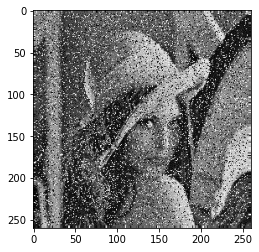

(260, 260)

In [ ]:
output = np.zeros((img.shape[0], img.shape[1]), np.float32)
img=cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
mimg = cv2.copyMakeBorder(img, kernel_size,kernel_size,kernel_size,kernel_size, cv2.BORDER_REPLICATE)
plt.imshow(cv2.cvtColor(mimg, cv2.COLOR_BGR2RGB))
plt.show()
mimg.shape

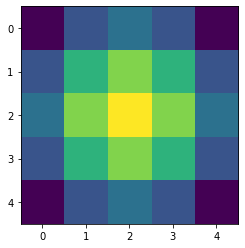

In [ ]:
gf = np.zeros((2*kernel_size+1, 2*kernel_size+1), dtype="float32")

for i in range(-kernel_size, kernel_size+1):
    for j in range (-kernel_size, kernel_size+1):
        gf[i+kernel_size][j+kernel_size]=np.exp(-(pow(i,2)+pow(j,2))/(2*pow(sigma,2)))
range_filter = np.zeros((gf.shape[0],gf.shape[1]), np.float32)
plt.imshow(gf)

In [ ]:
for i in range (kernel_size, mimg.shape[0]-kernel_size):
    for j in range(kernel_size, mimg.shape[1]-kernel_size):
        sum = 0
        mid = int(mimg[i][j])
        for p in range(-kernel_size, kernel_size+1):
            for q in range(-kernel_size, kernel_size+1):
                distance = int(mimg[p+i][q+j])-mid
                range_filter[p-kernel_size][q-kernel_size]=np.exp(-distance**2/(sigma**2))/(sigma**2)
        filter = np.multiply(gf, range_filter)
        norm = np.sum(filter)
        for p in range(-kernel_size, kernel_size+1):
            for q in range(-kernel_size, kernel_size+1):
                sum+=mimg[i-(p+kernel_size)][j-(q+kernel_size)]*filter[p+kernel_size][q+kernel_size]
        output[i-kernel_size][j-kernel_size] = sum/norm

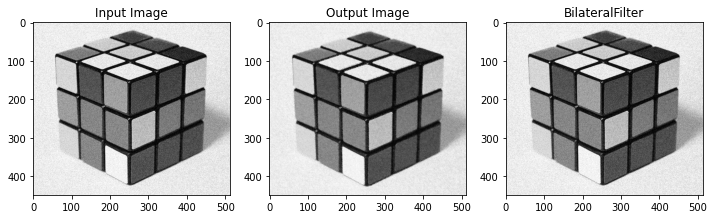

In [ ]:
bilFilter = cv2.bilateralFilter(img, kernel_size*2+1, sigma, sigma)

figure , (axis_1, axis_2,axis_3) = plt.subplots(1,3, figsize=(12,12))
axis_1.imshow(img, "gray")
axis_1.set_title("Input Image")
axis_2.imshow(output, "gray")
axis_2.set_title("Output Image")
axis_3.set_title("BilateralFilter")
axis_3.imshow(bilFilter, "gray")

Mean

Enter Kernel Size: 5


Text(0.5, 1.0, 'Output Image')

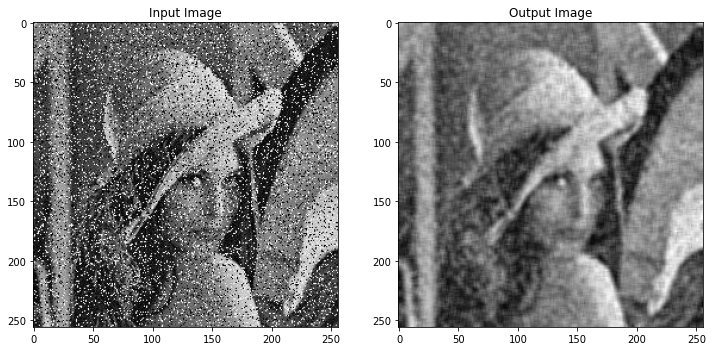

In [ ]:
kernel_size = int(input("Enter Kernel Size: "))
kernel = np.ones((kernel_size, kernel_size), np.float32)
kernel_size=kernel_size//2
output = np.zeros((img.shape[0], img.shape[1]), np.float32)
norm = kernel.sum()
mimg = cv2.copyMakeBorder(img,kernel_size, kernel_size, kernel_size, kernel_size, cv2.BORDER_REPLICATE)
for i in range(2*kernel_size, mimg.shape[0]):
    for j in range(2*kernel_size,mimg.shape[1]):
        sum = 0
        for p in range(-kernel_size, kernel_size+1):
            for q in range(-kernel_size, kernel_size+1):
                sum+=mimg[i-(p+kernel_size)][j-(q+kernel_size)]*kernel[p+kernel_size][q+kernel_size]
        output[i-(2*kernel_size)][j-(2*kernel_size)] = sum
output/=norm
figure, (axis_1, axis_2) = plt.subplots(1,2, figsize=(12,12))
axis_1.imshow(img, "gray")
axis_1.set_title("Input Image")
axis_2.imshow(output, "gray")
axis_2.set_title("Output Image")

Gaushian

In [ ]:
def conv(kernel_size,filter):
    output = np.zeros((img.shape[0], img.shape[1]), np.float32)
    mimg = cv2.copyMakeBorder(img,kernel_size, kernel_size, kernel_size, kernel_size, cv2.BORDER_REPLICATE)
    for i in range(2*kernel_size, mimg.shape[0]):
        for j in range(2*kernel_size,mimg.shape[1]):
            sum = 0
            for p in range(-kernel_size, kernel_size+1):
                for q in range(-kernel_size, kernel_size+1):
                    sum+=mimg[i-(p+kernel_size)][j-(q+kernel_size)]*filter[p+kernel_size][q+kernel_size]
            output[i-(2*kernel_size)][j-(2*kernel_size)] = sum
    
    return output

In [ ]:
def gaussian_kernel():
    kernel_size = int(input("Enter kernel Size: "))
    kernel_size = kernel_size//2
    sigma = 0.3*((kernel_size-1)*0.5-1)+0.8
    sigma = sigma*3 
    gf = np.zeros((2*kernel_size+1, 2*kernel_size+1), np.float32)

    for i in range(-kernel_size, kernel_size+1):
        for j in range (-kernel_size, kernel_size+1):
            gf[i+kernel_size][j+kernel_size]=np.exp(-(pow(i,2)+pow(j,2))/(2*pow(sigma,2)))
    return gf, kernel_size

Enter kernel Size: 5


Text(0.5, 1.0, 'Output Image')

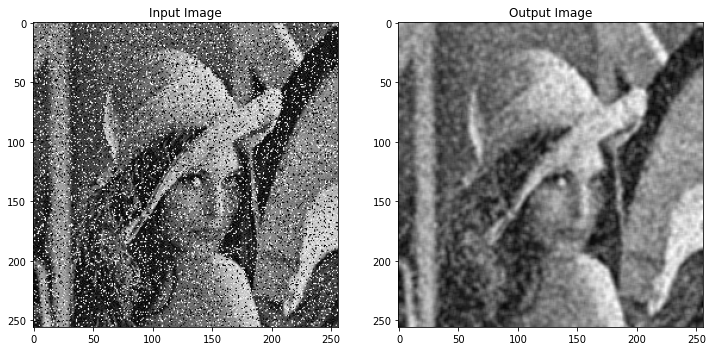

In [ ]:
kernel, kernel_size = gaussian_kernel()
output  = conv(kernel_size, kernel)
figure, (axis_1, axis_2) = plt.subplots(1,2, figsize=(12,12))
axis_1.imshow(img, "gray")
axis_1.set_title("Input Image")
axis_2.imshow(output, "gray")
axis_2.set_title("Output Image")

Laplacian

In [ ]:
def laplacian_kernelp():
    lf = [[0,-1,0],[-1,4,-1],[0,-1,0]]
    return lf

def laplacian_kerneln():
    lf = [[0,1,0],[1,-4,1],[0,1,0]]
    return lf

Text(0.5, 1.0, 'Output with negative center')

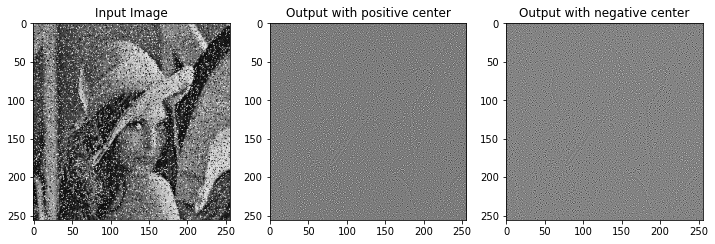

In [ ]:
kernel = laplacian_kernelp()
kernel = np.array(kernel)
outputp = conv(kernel.shape[0]//2, kernel)

kernel = laplacian_kerneln()
kernel = np.array(kernel)
outputn=conv(kernel.shape[0]//2, kernel)


figure, (axis_1, axis_2, axis_3) = plt.subplots(1,3, figsize=(12,12))
axis_1.imshow(img, "gray")
axis_1.set_title("Input Image")
axis_2.imshow(outputp, "gray")
axis_2.set_title("Output with positive center")
axis_3.imshow(outputn, "gray")
axis_3.set_title("Output with negative center")

Sobel

In [ ]:
def horizontal_sobel_kernel(kernel_size: int):
    
    row_value = [[0 for i in range(kernel_size)] for j in range(1)]
    col_value = [[1 for i in range(1)] for j in range(kernel_size)]
    center = kernel_size//2
    col_value[center][0] = 2
    for i in range(1):
        for j in range(kernel_size):
            row_value[i][j]=center
            center-=1
    horizontal_sobel_kernel = [[0 for i in range(kernel_size)] for j in range(kernel_size)]
    horizontal_sobel_kernel = np.matmul(col_value, row_value)
    return horizontal_sobel_kernel

def vertical_sobel_kernel(kernel_size: int):
    
    col_value = [[0 for i in range(1)] for j in range(kernel_size)]
    row_value = [[1 for i in range(kernel_size)] for j in range(1)]
    center = kernel_size//2
    row_value[0][center]=2
    for i in range(kernel_size):
        for j in range(1):
            col_value[i][j]=center
            center-=1
    vertical_sobel_kernel = [[0 for i in range(kernel_size)] for j in range(kernel_size)]
    vertical_sobel_kernel = np.matmul(col_value, row_value)
    return vertical_sobel_kernel

Enter Kernel Size5


Text(0.5, 1.0, 'Output Image(Merged)')

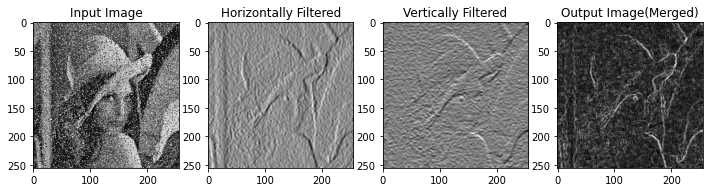

In [ ]:
kernel_size = int(input("Enter Kernel Size"))
kernel = horizontal_sobel_kernel(kernel_size)
kernel = np.array(kernel)

h = conv(kernel_size//2, kernel)


kernel = vertical_sobel_kernel(kernel_size)
kernel = np.array(kernel)

v = conv(kernel_size//2, kernel)

output = np.zeros((v.shape[0], v.shape[1]), np.float32)
#gradient Magnitude
for i in range(v.shape[0]):
    for j in range(v.shape[1]):
        output[i][j] = np.sqrt(pow(h[i][j],2)+pow(v[i][j],2))


figure, (axis_1, axis_2, axis_3, axis_4) = plt.subplots(1,4, figsize=(12,12))
axis_1.imshow(img, "gray")
axis_1.set_title("Input Image")
axis_2.imshow(h, "gray")
axis_2.set_title("Horizontally Filtered")
axis_3.imshow(v, "gray")
axis_3.set_title("Vertically Filtered")
axis_4.imshow(output, "gray")
axis_4.set_title("Output Image(Merged)")

Schar

In [ ]:
def horizontal_scharr_kernel():
    horizontal_schar_kernel = [[3,0,-3],[10,0,-10],[3,0,-3]]
    return horizontal_schar_kernel

def vertical_scharr_kernel():
    vertical_schar_kernel = [[3,10,3],[0,0,0],[-3,-10,-3]]
    return vertical_schar_kernel

Text(0.5, 1.0, 'Output Image(Merged)')

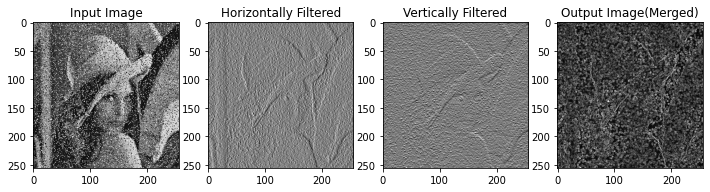

In [ ]:
kernel = horizontal_scharr_kernel()
kernel = np.array(kernel)
h = conv(kernel.shape[0]//2, kernel)

kernel = vertical_scharr_kernel()
kernel = np.array(kernel)
v = conv(kernel.shape[0]//2, kernel)

output = np.zeros((v.shape[0], v.shape[1]), np.float32)
#gradient Magnitude
for i in range(v.shape[0]):
    for j in range(v.shape[1]):
        output[i][j] = np.sqrt(pow(h[i][j],2)+pow(v[i][j],2))

figure, (axis_1, axis_2, axis_3, axis_4) = plt.subplots(1,4, figsize=(12,12))
axis_1.imshow(img, "gray")
axis_1.set_title("Input Image")
axis_2.imshow(h, "gray")
axis_2.set_title("Horizontally Filtered")
axis_3.imshow(v, "gray")
axis_3.set_title("Vertically Filtered")
axis_4.imshow(output, "gray")
axis_4.set_title("Output Image(Merged)")

Prewitt

In [ ]:
def horizontal_prewitt_kernel():
    horizontal_prewitt_kernel = [[1,0,-1],[1,0,-1],[1,0,-1]]
    return horizontal_prewitt_kernel

def vertical_prewitt_kernel():
    vertical_prewitt_kernel = [[1,1,1],[0,0,0],[-1,-1,-1]]
    return vertical_prewitt_kernel

Text(0.5, 1.0, 'Output Image(Merged)')

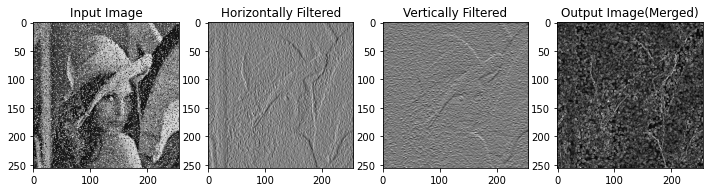

In [ ]:
kernel = horizontal_prewitt_kernel()
kernel = np.array(kernel)
h = conv(kernel.shape[0]//2, kernel)

kernel = vertical_prewitt_kernel()
kernel = np.array(kernel)
v = conv(kernel.shape[0]//2, kernel)

output = np.zeros((v.shape[0], v.shape[1]), np.float32)
#gradient Magnitude
for i in range(v.shape[0]):
    for j in range(v.shape[1]):
        output[i][j] = np.sqrt(pow(h[i][j],2)+pow(v[i][j],2))

figure, (axis_1, axis_2, axis_3, axis_4) = plt.subplots(1,4, figsize=(12,12))
axis_1.imshow(img, "gray")
axis_1.set_title("Input Image")
axis_2.imshow(h, "gray")
axis_2.set_title("Horizontally Filtered")
axis_3.imshow(v, "gray")
axis_3.set_title("Vertically Filtered")
axis_4.imshow(output, "gray")
axis_4.set_title("Output Image(Merged)")

Robert

In [ ]:
def horizontal_roberts_kernel():
    horizontal_roberts_kernel = [[0,0,0],[0,1,0],[0,0,-1]]
    return horizontal_roberts_kernel

def vertical_roberts_kernel():
    vertical_roberts_kernel = [[0,0,0],[0,0,1],[0,-1,0]]
    return vertical_roberts_kernel

Text(0.5, 1.0, 'Output Image(Merged)')

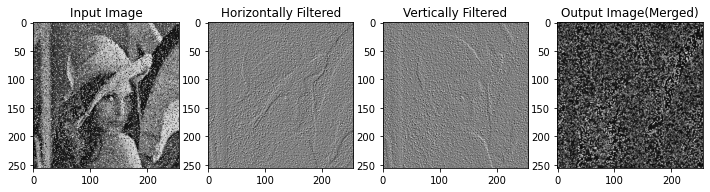

In [ ]:
kernel = horizontal_roberts_kernel()
kernel = np.array(kernel)
h = conv(kernel.shape[0]//2, kernel)

kernel = vertical_roberts_kernel()
kernel = np.array(kernel)
v = conv(kernel.shape[0]//2, kernel)

output = np.zeros((v.shape[0], v.shape[1]), np.float32)
#gradient Magnitude
for i in range(v.shape[0]):
    for j in range(v.shape[1]):
        output[i][j] = np.sqrt(pow(h[i][j],2)+pow(v[i][j],2))

figure, (axis_1, axis_2, axis_3, axis_4) = plt.subplots(1,4, figsize=(12,12))
axis_1.imshow(img, "gray")
axis_1.set_title("Input Image")
axis_2.imshow(h, "gray")
axis_2.set_title("Horizontally Filtered")
axis_3.imshow(v, "gray")
axis_3.set_title("Vertically Filtered")
axis_4.imshow(output, "gray")
axis_4.set_title("Output Image(Merged)")

Midean

Enter Kernel Size: 5


Text(0.5, 1.0, 'Output Image')

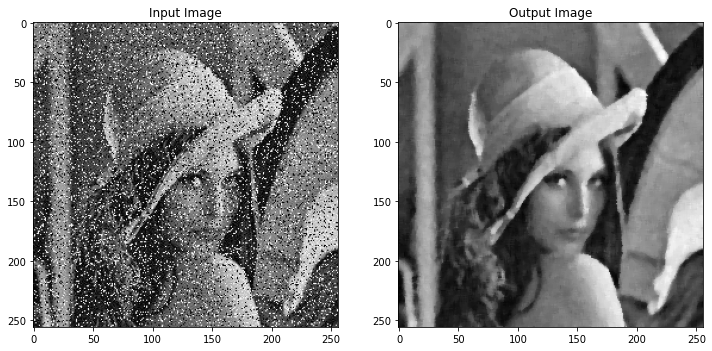

In [ ]:
kernel_size = int(input("Enter Kernel Size: "))
kernel = np.ones((kernel_size, kernel_size), np.float32)

kernel_size=kernel_size//2
total = kernel_size*kernel_size
mimg = cv2.copyMakeBorder(img,kernel_size, kernel_size, kernel_size, kernel_size, cv2.BORDER_REPLICATE)

output = np.zeros((img.shape[0], img.shape[1]), np.float32)
for i in range(2*kernel_size, mimg.shape[0]):
    for j in range(2*kernel_size,mimg.shape[1]):
        values = []
        for p in range(-kernel_size, kernel_size+1):
            for q in range(-kernel_size, kernel_size+1):
                values.append(mimg[i-(p+kernel_size)][j-(q+kernel_size)]*kernel[p+kernel_size][q+kernel_size])
        values.sort()
        median = len(values)//2
        output[i-(2*kernel_size)][j-(2*kernel_size)] = values[median]/total


figure, (axis_1, axis_2) = plt.subplots(1,2, figsize=(12,12))
axis_1.imshow(img, "gray")
axis_1.set_title("Input Image")
axis_2.imshow(output, "gray")
axis_2.set_title("Output Image")